<a href="https://colab.research.google.com/github/artikwh/Multiclass-Fish-Image-Classification/blob/main/Multiclass_Fish_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pillow

In [ ]:
!pip install tensorflow

In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet, InceptionV3, EfficientNetB0
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix

In [ ]:
path = "/content/drive/MyDrive/fishdata/images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food black_sea_sprat"

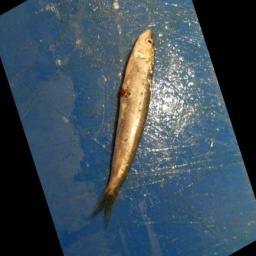

In [ ]:
im = Image.open('/content/drive/MyDrive/fishdata/images.cv_jzk6llhf18tm3k0kyttxz/data/train/fish sea_food black_sea_sprat/01F5NP0WCYCF.jpg')
im

In [ ]:
im.size

(256, 256)

 Data agumentation and pre-processing using tensorflow

In [2]:
gen = ImageDataGenerator(
                  rescale=1./255.,
                  rotation_range = 20,
                  horizontal_flip = True,
                  width_shift_range = 0.2,
                  height_shift_range = 0.2,
                  shear_range = 0.2,
                  zoom_range = 0.2,
                  fill_mode = 'nearest'
                 )

In [3]:
#train data & Validation data
train_data = gen.flow_from_directory(
    "/content/drive/MyDrive/fishdata/images.cv_jzk6llhf18tm3k0kyttxz/data/train",
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = True,
    subset = 'training',
)
val_data = gen.flow_from_directory(
    "/content/drive/MyDrive/fishdata/images.cv_jzk6llhf18tm3k0kyttxz/data/val",
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = True,

)

Found 5128 images belonging to 10 classes.
Found 905 images belonging to 10 classes.


In [4]:
print(train_data.class_indices)
print(train_data.classes)

{'animal fish bass': 0, 'fish sea_food black_sea_sprat': 1, 'fish sea_food gilt_head_bream': 2, 'fish sea_food hourse_mackerel': 3, 'fish sea_food red_mullet': 4, 'fish sea_food red_sea_bream': 5, 'fish sea_food sea_bass': 6, 'fish sea_food shrimp': 7, 'fish sea_food striped_red_mullet': 8, 'fish sea_food trout': 9}
[0 0 0 ... 9 9 9]


[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


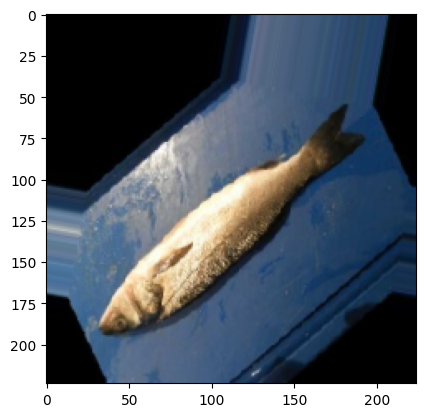

In [ ]:
image, label = next(train_data)
plt.imshow(image[0])
print(label[0])
plt.show()

In [5]:
input_shape = (224, 224, 3)
num_classes = train_data.num_classes

Train a CNN model from scratch

In [6]:
# Define CNN Model
model = Sequential([
        Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D(2,2),

        Conv2D(64, (3,3), activation='relu', padding='same'),
        MaxPooling2D(2,2),

        Conv2D(128, (3,3), activation='relu', padding='same'),
        MaxPooling2D(2,2),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [8]:
cnn_path = "/content/drive/MyDrive/fishdata/images.cv_jzk6llhf18tm3k0kyttxz/data/fish_claification_cnn.keras"
check_point = ModelCheckpoint(cnn_path , save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# Train CNN Model
history = model.fit(train_data, epochs=30, validation_data=val_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 3504s 22s/step - accuracy: 0.1477 - loss: 2.2512 - val_accuracy: 0.3923 - val_loss: 1.7422
Epoch 2/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 102s 638ms/step - accuracy: 0.3744 - loss: 1.6893 - val_accuracy: 0.3956 - val_loss: 1.4556
Epoch 3/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 97s 604ms/step - accuracy: 0.4745 - loss: 1.3924 - val_accuracy: 0.6232 - val_loss: 1.1317
Epoch 4/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 97s 600ms/step - accuracy: 0.5393 - loss: 1.2215 - val_accuracy: 0.6431 - val_loss: 1.0017
Epoch 5/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 97s 601ms/step - accuracy: 0.5896 - loss: 1.0984 - val_accuracy: 0.7083 - val_loss: 0.8805
Epoch 6/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 96s 595ms/step - accuracy: 0.6329 - loss: 0.9697 - val_accuracy: 0.5945 - val_loss: 1.1096
Epoch 7/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 149s 639ms/step - accuracy: 0.6424 - loss: 0.9756 - val_accuracy: 0.8077 - val_loss: 0.6334
Epoch 8/30
161/161 ━━━━━━━━━━━━━━━━━━━━ 95s 592ms/step - accuracy: 0.6828 - loss:

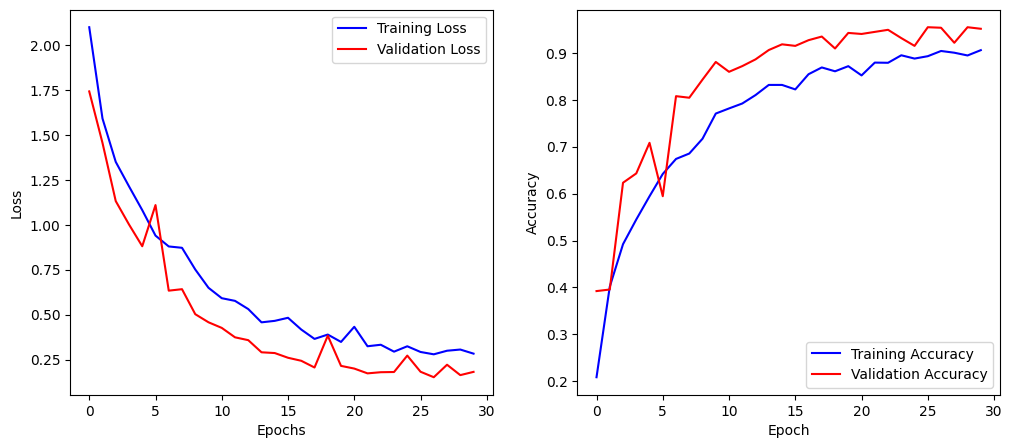

In [9]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = "Training Loss", color = "blue")
plt.plot(history.history["val_loss"], label = "Validation Loss", color = "red")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label = "Training Accuracy", color = "blue")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy", color = "red")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [16]:
#save the model
model.save(cnn_path)

29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 490ms/step
Accuracy: 0.12486187845303867
Precision: 0.11364414478762108
Recall: 0.11347203562953523
F1 Score: 0.1135000969566929


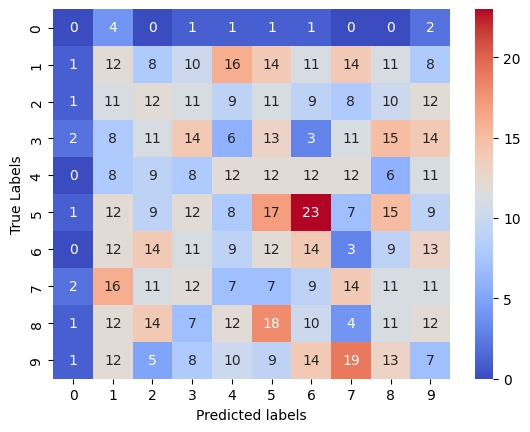

In [18]:
val_preds = np.argmax(model.predict(val_data), axis=1)
val_labels = val_data.classes
accuracy = accuracy_score(val_labels, val_preds)
print(f"Accuracy: {accuracy}")
precision = precision_score(val_labels, val_preds, average='macro', zero_division=1)
print(f"Precision: {precision}")
recall = recall_score(val_labels, val_preds, average='macro')
print(f"Recall: {recall}")
f1 = f1_score(val_labels, val_preds, average='macro')
print(f"F1 Score: {f1}")
conf_matrix = confusion_matrix(val_labels, val_preds)
sns.heatmap(conf_matrix, annot =True, fmt= 'd', cmap= "coolwarm")
plt.xlabel("Predicted labels")
plt.ylabel("True Labels")
plt.show()

Experiment with five pre-trained models ( VGG16, ResNet50, MobileNet, InceptionV3, EfficientNetB0)

In [19]:
# List of pre-trained models
pretrained_models = {
    "VGG16": VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3)),
    "ResNet50": ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3)),
    "MobileNet": MobileNet(weights="imagenet", include_top=False, input_shape=(224, 224, 3)),
    "InceptionV3": InceptionV3(weights="imagenet", include_top=False, input_shape=(224, 224, 3)),
    "EfficientNetB0": EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
}

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [20]:
# Function to load and modify a pre-trained model
def load_pretrained_model(base_model, input_shape, num_classes):

  base_model.trainable = False

  model = Sequential([
          base_model,
          GlobalAveragePooling2D(),
          Dense(128, activation='relu'),
          Dropout(0.5),
          Dense(num_classes, activation='softmax')
      ])
  model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [21]:
# Train and evaluate each pretrained model
best_model = None
best_accuracy = 0.0
BEST_MODEL_PATH = "/content/drive/MyDrive/fishdata/images.cv_jzk6llhf18tm3k0kyttxz/data/best_fish_classifier.keras"
history_dict = {}
metrics_dict = {}

for model_name, base_model in pretrained_models.items():
    print(f"\nTraining {model_name} model...\n")
    model = load_pretrained_model(base_model, (224, 224, 3), num_classes)
    checkpoint = ModelCheckpoint(BEST_MODEL_PATH, save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    history = model.fit(train_data, epochs=10, validation_data=val_data, callbacks=[checkpoint, early_stopping])

    history_dict[model_name] = history.history

    val_preds = np.argmax(model.predict(val_data), axis=1)
    val_labels = val_data.classes

    accuracy = accuracy_score(val_labels, val_preds)
    metrics_dict[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision_score(val_labels, val_preds, average='macro', zero_division=1),
        "Recall": recall_score(val_labels, val_preds, average='macro'),
        "F1 Score": f1_score(val_labels, val_preds, average='macro'),
        "Confusion Matrix": confusion_matrix(val_labels, val_preds)
    }
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        name = model_name

# Save the Best Model
if best_model:
    best_model.save(BEST_MODEL_PATH)
    joblib.dump(metrics_dict, "model_metrics.pkl")


print(f"Best model {name} saved with accuracy: {best_accuracy}")


Training VGG16 model...

Epoch 1/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 556ms/step - accuracy: 0.2104 - loss: 2.1907
Epoch 1: val_accuracy improved from -inf to 0.62873, saving model to /content/drive/MyDrive/fishdata/images.cv_jzk6llhf18tm3k0kyttxz/data/best_fish_classifier.h5


161/161 ━━━━━━━━━━━━━━━━━━━━ 125s 691ms/step - accuracy: 0.2110 - loss: 2.1895 - val_accuracy: 0.6287 - val_loss: 1.6210
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 544ms/step - accuracy: 0.4947 - loss: 1.5556
Epoch 2: val_accuracy improved from 0.62873 to 0.73481, saving model to /content/drive/MyDrive/fishdata/images.cv_jzk6llhf18tm3k0kyttxz/data/best_fish_classifier.h5


161/161 ━━━━━━━━━━━━━━━━━━━━ 104s 647ms/step - accuracy: 0.4949 - loss: 1.5550 - val_accuracy: 0.7348 - val_loss: 1.1760
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 529ms/step - accuracy: 0.6099 - loss: 1.2201
Epoch 3: val_accuracy improved from 0.73481 to 0.73923, saving model to /content/drive/MyDrive/fishdata/images.cv_jzk6llhf18tm3k0kyttxz/data/best_fish_classifier.h5


161/161 ━━━━━━━━━━━━━━━━━━━━ 139s 630ms/step - accuracy: 0.6100 - loss: 1.2197 - val_accuracy: 0.7392 - val_loss: 0.9410
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 534ms/step - accuracy: 0.6736 - loss: 1.0102
Epoch 4: val_accuracy improved from 0.73923 to 0.81657, saving model to /content/drive/MyDrive/fishdata/images.cv_jzk6llhf18tm3k0kyttxz/data/best_fish_classifier.h5


161/161 ━━━━━━━━━━━━━━━━━━━━ 103s 637ms/step - accuracy: 0.6737 - loss: 1.0100 - val_accuracy: 0.8166 - val_loss: 0.7678
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 539ms/step - accuracy: 0.7193 - loss: 0.8948
Epoch 5: val_accuracy improved from 0.81657 to 0.82762, saving model to /content/drive/MyDrive/fishdata/images.cv_jzk6llhf18tm3k0kyttxz/data/best_fish_classifier.h5


161/161 ━━━━━━━━━━━━━━━━━━━━ 104s 644ms/step - accuracy: 0.7193 - loss: 0.8946 - val_accuracy: 0.8276 - val_loss: 0.6605
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 524ms/step - accuracy: 0.7571 - loss: 0.7680
Epoch 6: val_accuracy improved from 0.82762 to 0.85414, saving model to /content/drive/MyDrive/fishdata/images.cv_jzk6llhf18tm3k0kyttxz/data/best_fish_classifier.h5


161/161 ━━━━━━━━━━━━━━━━━━━━ 139s 626ms/step - accuracy: 0.7571 - loss: 0.7679 - val_accuracy: 0.8541 - val_loss: 0.5521
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 531ms/step - accuracy: 0.7850 - loss: 0.6868
Epoch 7: val_accuracy did not improve from 0.85414
161/161 ━━━━━━━━━━━━━━━━━━━━ 142s 627ms/step - accuracy: 0.7850 - loss: 0.6867 - val_accuracy: 0.8530 - val_loss: 0.5163
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 532ms/step - accuracy: 0.7814 - loss: 0.6469
Epoch 8: val_accuracy improved from 0.85414 to 0.87956, saving model to /content/drive/MyDrive/fishdata/images.cv_jzk6llhf18tm3k0kyttxz/data/best_fish_classifier.h5


161/161 ━━━━━━━━━━━━━━━━━━━━ 102s 633ms/step - accuracy: 0.7814 - loss: 0.6469 - val_accuracy: 0.8796 - val_loss: 0.4522
Epoch 9/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 537ms/step - accuracy: 0.8086 - loss: 0.5922
Epoch 9: val_accuracy improved from 0.87956 to 0.90718, saving model to /content/drive/MyDrive/fishdata/images.cv_jzk6llhf18tm3k0kyttxz/data/best_fish_classifier.h5


161/161 ━━━━━━━━━━━━━━━━━━━━ 143s 639ms/step - accuracy: 0.8086 - loss: 0.5922 - val_accuracy: 0.9072 - val_loss: 0.3941
Epoch 10/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 528ms/step - accuracy: 0.8098 - loss: 0.5586
Epoch 10: val_accuracy did not improve from 0.90718
161/161 ━━━━━━━━━━━━━━━━━━━━ 101s 624ms/step - accuracy: 0.8099 - loss: 0.5584 - val_accuracy: 0.9072 - val_loss: 0.3626
29/29 ━━━━━━━━━━━━━━━━━━━━ 16s 526ms/step

Training ResNet50 model...

Epoch 1/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 552ms/step - accuracy: 0.1013 - loss: 2.3410
Epoch 1: val_accuracy improved from -inf to 0.15138, saving model to /content/drive/MyDrive/fishdata/images.cv_jzk6llhf18tm3k0kyttxz/data/best_fish_classifier.h5


161/161 ━━━━━━━━━━━━━━━━━━━━ 127s 707ms/step - accuracy: 0.1014 - loss: 2.3407 - val_accuracy: 0.1514 - val_loss: 2.2409
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 538ms/step - accuracy: 0.1188 - loss: 2.2437
Epoch 2: val_accuracy improved from 0.15138 to 0.15470, saving model to /content/drive/MyDrive/fishdata/images.cv_jzk6llhf18tm3k0kyttxz/data/best_fish_classifier.h5


161/161 ━━━━━━━━━━━━━━━━━━━━ 126s 646ms/step - accuracy: 0.1188 - loss: 2.2437 - val_accuracy: 0.1547 - val_loss: 2.2260
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 532ms/step - accuracy: 0.1308 - loss: 2.2216
Epoch 3: val_accuracy improved from 0.15470 to 0.19890, saving model to /content/drive/MyDrive/fishdata/images.cv_jzk6llhf18tm3k0kyttxz/data/best_fish_classifier.h5


161/161 ━━━━━━━━━━━━━━━━━━━━ 108s 674ms/step - accuracy: 0.1308 - loss: 2.2215 - val_accuracy: 0.1989 - val_loss: 2.2038
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 524ms/step - accuracy: 0.1425 - loss: 2.2052
Epoch 4: val_accuracy did not improve from 0.19890
161/161 ━━━━━━━━━━━━━━━━━━━━ 133s 620ms/step - accuracy: 0.1425 - loss: 2.2052 - val_accuracy: 0.1746 - val_loss: 2.1873
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 543ms/step - accuracy: 0.1418 - loss: 2.1974
Epoch 5: val_accuracy did not improve from 0.19890
161/161 ━━━━━━━━━━━━━━━━━━━━ 108s 672ms/step - accuracy: 0.1418 - loss: 2.1974 - val_accuracy: 0.1812 - val_loss: 2.1731
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.1467 - loss: 2.1832
Epoch 6: val_accuracy improved from 0.19890 to 0.20663, saving model to /content/drive/MyDrive/fishdata/images.cv_jzk6llhf18tm3k0kyttxz/data/best_fish_classifier.h5


161/161 ━━━━━━━━━━━━━━━━━━━━ 99s 614ms/step - accuracy: 0.1467 - loss: 2.1831 - val_accuracy: 0.2066 - val_loss: 2.1502
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - accuracy: 0.1560 - loss: 2.1641
Epoch 7: val_accuracy did not improve from 0.20663
161/161 ━━━━━━━━━━━━━━━━━━━━ 102s 632ms/step - accuracy: 0.1560 - loss: 2.1641 - val_accuracy: 0.1923 - val_loss: 2.1519
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 553ms/step - accuracy: 0.1699 - loss: 2.1482
Epoch 8: val_accuracy did not improve from 0.20663
161/161 ━━━━━━━━━━━━━━━━━━━━ 104s 647ms/step - accuracy: 0.1699 - loss: 2.1481 - val_accuracy: 0.1956 - val_loss: 2.1323
Epoch 9/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 524ms/step - accuracy: 0.1704 - loss: 2.1406
Epoch 9: val_accuracy did not improve from 0.20663
161/161 ━━━━━━━━━━━━━━━━━━━━ 99s 615ms/step - accuracy: 0.1704 - loss: 2.1407 - val_accuracy: 0.1967 - val_loss: 2.1222
Epoch 10/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 508ms/step - accuracy: 0.1713 - loss: 2.1295
Epoch 10: va

161/161 ━━━━━━━━━━━━━━━━━━━━ 107s 619ms/step - accuracy: 0.5266 - loss: 1.4689 - val_accuracy: 0.9436 - val_loss: 0.2165
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step - accuracy: 0.8853 - loss: 0.3477
Epoch 2: val_accuracy improved from 0.94365 to 0.97680, saving model to /content/drive/MyDrive/fishdata/images.cv_jzk6llhf18tm3k0kyttxz/data/best_fish_classifier.h5


161/161 ━━━━━━━━━━━━━━━━━━━━ 93s 578ms/step - accuracy: 0.8855 - loss: 0.3474 - val_accuracy: 0.9768 - val_loss: 0.1032
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step - accuracy: 0.9363 - loss: 0.2071
Epoch 3: val_accuracy improved from 0.97680 to 0.98122, saving model to /content/drive/MyDrive/fishdata/images.cv_jzk6llhf18tm3k0kyttxz/data/best_fish_classifier.h5


161/161 ━━━━━━━━━━━━━━━━━━━━ 142s 577ms/step - accuracy: 0.9363 - loss: 0.2071 - val_accuracy: 0.9812 - val_loss: 0.0688
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step - accuracy: 0.9478 - loss: 0.1738
Epoch 4: val_accuracy improved from 0.98122 to 0.98453, saving model to /content/drive/MyDrive/fishdata/images.cv_jzk6llhf18tm3k0kyttxz/data/best_fish_classifier.h5


161/161 ━━━━━━━━━━━━━━━━━━━━ 93s 576ms/step - accuracy: 0.9478 - loss: 0.1738 - val_accuracy: 0.9845 - val_loss: 0.0547
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step - accuracy: 0.9540 - loss: 0.1382
Epoch 5: val_accuracy did not improve from 0.98453
161/161 ━━━━━━━━━━━━━━━━━━━━ 141s 567ms/step - accuracy: 0.9540 - loss: 0.1381 - val_accuracy: 0.9724 - val_loss: 0.0805
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step - accuracy: 0.9598 - loss: 0.1185
Epoch 6: val_accuracy did not improve from 0.98453
161/161 ━━━━━━━━━━━━━━━━━━━━ 91s 566ms/step - accuracy: 0.9598 - loss: 0.1184 - val_accuracy: 0.9845 - val_loss: 0.0366
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step - accuracy: 0.9692 - loss: 0.1002
Epoch 7: val_accuracy improved from 0.98453 to 0.99116, saving model to /content/drive/MyDrive/fishdata/images.cv_jzk6llhf18tm3k0kyttxz/data/best_fish_classifier.h5


161/161 ━━━━━━━━━━━━━━━━━━━━ 93s 576ms/step - accuracy: 0.9692 - loss: 0.1002 - val_accuracy: 0.9912 - val_loss: 0.0311
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step - accuracy: 0.9738 - loss: 0.0862
Epoch 8: val_accuracy did not improve from 0.99116
161/161 ━━━━━━━━━━━━━━━━━━━━ 91s 569ms/step - accuracy: 0.9737 - loss: 0.0862 - val_accuracy: 0.9823 - val_loss: 0.0392
Epoch 9/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - accuracy: 0.9643 - loss: 0.0991
Epoch 9: val_accuracy did not improve from 0.99116
161/161 ━━━━━━━━━━━━━━━━━━━━ 93s 579ms/step - accuracy: 0.9643 - loss: 0.0991 - val_accuracy: 0.9856 - val_loss: 0.0308
Epoch 10/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step - accuracy: 0.9674 - loss: 0.0900
Epoch 10: val_accuracy improved from 0.99116 to 0.99337, saving model to /content/drive/MyDrive/fishdata/images.cv_jzk6llhf18tm3k0kyttxz/data/best_fish_classifier.h5


161/161 ━━━━━━━━━━━━━━━━━━━━ 100s 622ms/step - accuracy: 0.9674 - loss: 0.0900 - val_accuracy: 0.9934 - val_loss: 0.0282
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 530ms/step

Training InceptionV3 model...

Epoch 1/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 556ms/step - accuracy: 0.4491 - loss: 1.6380
Epoch 1: val_accuracy improved from -inf to 0.87845, saving model to /content/drive/MyDrive/fishdata/images.cv_jzk6llhf18tm3k0kyttxz/data/best_fish_classifier.h5


161/161 ━━━━━━━━━━━━━━━━━━━━ 135s 739ms/step - accuracy: 0.4501 - loss: 1.6349 - val_accuracy: 0.8785 - val_loss: 0.4430
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 517ms/step - accuracy: 0.7844 - loss: 0.6255
Epoch 2: val_accuracy improved from 0.87845 to 0.91271, saving model to /content/drive/MyDrive/fishdata/images.cv_jzk6llhf18tm3k0kyttxz/data/best_fish_classifier.h5


161/161 ━━━━━━━━━━━━━━━━━━━━ 100s 619ms/step - accuracy: 0.7845 - loss: 0.6253 - val_accuracy: 0.9127 - val_loss: 0.2984
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 505ms/step - accuracy: 0.8227 - loss: 0.4984
Epoch 3: val_accuracy improved from 0.91271 to 0.92818, saving model to /content/drive/MyDrive/fishdata/images.cv_jzk6llhf18tm3k0kyttxz/data/best_fish_classifier.h5


161/161 ━━━━━━━━━━━━━━━━━━━━ 98s 611ms/step - accuracy: 0.8228 - loss: 0.4984 - val_accuracy: 0.9282 - val_loss: 0.2575
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 508ms/step - accuracy: 0.8501 - loss: 0.4183
Epoch 4: val_accuracy did not improve from 0.92818
161/161 ━━━━━━━━━━━━━━━━━━━━ 97s 600ms/step - accuracy: 0.8502 - loss: 0.4182 - val_accuracy: 0.9249 - val_loss: 0.2150
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.8658 - loss: 0.3821
Epoch 5: val_accuracy did not improve from 0.92818
161/161 ━━━━━━━━━━━━━━━━━━━━ 102s 635ms/step - accuracy: 0.8659 - loss: 0.3820 - val_accuracy: 0.9260 - val_loss: 0.1961
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 504ms/step - accuracy: 0.8876 - loss: 0.3158
Epoch 6: val_accuracy improved from 0.92818 to 0.95249, saving model to /content/drive/MyDrive/fishdata/images.cv_jzk6llhf18tm3k0kyttxz/data/best_fish_classifier.h5


161/161 ━━━━━━━━━━━━━━━━━━━━ 97s 606ms/step - accuracy: 0.8876 - loss: 0.3158 - val_accuracy: 0.9525 - val_loss: 0.1469
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 509ms/step - accuracy: 0.8983 - loss: 0.2955
Epoch 7: val_accuracy improved from 0.95249 to 0.95912, saving model to /content/drive/MyDrive/fishdata/images.cv_jzk6llhf18tm3k0kyttxz/data/best_fish_classifier.h5


161/161 ━━━━━━━━━━━━━━━━━━━━ 98s 610ms/step - accuracy: 0.8983 - loss: 0.2956 - val_accuracy: 0.9591 - val_loss: 0.1419
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 518ms/step - accuracy: 0.8845 - loss: 0.3160
Epoch 8: val_accuracy did not improve from 0.95912
161/161 ━━━━━━━━━━━━━━━━━━━━ 98s 609ms/step - accuracy: 0.8845 - loss: 0.3160 - val_accuracy: 0.9381 - val_loss: 0.1662
Epoch 9/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.8953 - loss: 0.3001
Epoch 9: val_accuracy did not improve from 0.95912
161/161 ━━━━━━━━━━━━━━━━━━━━ 97s 603ms/step - accuracy: 0.8953 - loss: 0.3001 - val_accuracy: 0.9425 - val_loss: 0.1586
Epoch 10/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 510ms/step - accuracy: 0.8957 - loss: 0.3053
Epoch 10: val_accuracy did not improve from 0.95912
161/161 ━━━━━━━━━━━━━━━━━━━━ 97s 601ms/step - accuracy: 0.8957 - loss: 0.3053 - val_accuracy: 0.9591 - val_loss: 0.1312
29/29 ━━━━━━━━━━━━━━━━━━━━ 26s 685ms/step

Training EfficientNetB0 model...

Epoch 1/10
161/161 ━━━━━

161/161 ━━━━━━━━━━━━━━━━━━━━ 139s 722ms/step - accuracy: 0.1087 - loss: 2.2947 - val_accuracy: 0.0994 - val_loss: 2.2438
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 503ms/step - accuracy: 0.1023 - loss: 2.2523
Epoch 2: val_accuracy improved from 0.09945 to 0.11050, saving model to /content/drive/MyDrive/fishdata/images.cv_jzk6llhf18tm3k0kyttxz/data/best_fish_classifier.h5


161/161 ━━━━━━━━━━━━━━━━━━━━ 97s 604ms/step - accuracy: 0.1023 - loss: 2.2523 - val_accuracy: 0.1105 - val_loss: 2.2400
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step - accuracy: 0.1083 - loss: 2.2464
Epoch 3: val_accuracy improved from 0.11050 to 0.11160, saving model to /content/drive/MyDrive/fishdata/images.cv_jzk6llhf18tm3k0kyttxz/data/best_fish_classifier.h5


161/161 ━━━━━━━━━━━━━━━━━━━━ 146s 631ms/step - accuracy: 0.1083 - loss: 2.2464 - val_accuracy: 0.1116 - val_loss: 2.2368
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step - accuracy: 0.1199 - loss: 2.2334
Epoch 4: val_accuracy did not improve from 0.11160
161/161 ━━━━━━━━━━━━━━━━━━━━ 93s 576ms/step - accuracy: 0.1199 - loss: 2.2334 - val_accuracy: 0.1116 - val_loss: 2.2363
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step - accuracy: 0.0967 - loss: 2.2406
Epoch 5: val_accuracy improved from 0.11160 to 0.12486, saving model to /content/drive/MyDrive/fishdata/images.cv_jzk6llhf18tm3k0kyttxz/data/best_fish_classifier.h5


161/161 ━━━━━━━━━━━━━━━━━━━━ 93s 578ms/step - accuracy: 0.0967 - loss: 2.2406 - val_accuracy: 0.1249 - val_loss: 2.2347
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step - accuracy: 0.1073 - loss: 2.2298
Epoch 6: val_accuracy did not improve from 0.12486
161/161 ━━━━━━━━━━━━━━━━━━━━ 92s 570ms/step - accuracy: 0.1073 - loss: 2.2298 - val_accuracy: 0.1039 - val_loss: 2.2344
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step - accuracy: 0.1097 - loss: 2.2316
Epoch 7: val_accuracy did not improve from 0.12486
161/161 ━━━━━━━━━━━━━━━━━━━━ 93s 576ms/step - accuracy: 0.1096 - loss: 2.2316 - val_accuracy: 0.1105 - val_loss: 2.2345
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step - accuracy: 0.1113 - loss: 2.2272
Epoch 8: val_accuracy did not improve from 0.12486
161/161 ━━━━━━━━━━━━━━━━━━━━ 92s 571ms/step - accuracy: 0.1113 - loss: 2.2273 - val_accuracy: 0.1083 - val_loss: 2.2362
Epoch 9/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step - accuracy: 0.1054 - loss: 2.2278
Epoch 9: val_ac

Best model InceptionV3 saved with accuracy: 0.12044198895027625


##Model Evaluation
#####Compare metrics such as accuracy, precision, recall, F1-score, and confusion matrix across all models.

In [24]:
# load metrics file
metrics_dict = joblib.load("model_metrics.pkl")
dic = pd.DataFrame.from_dict({model: {k: v for k, v in metrics_dict[model].items() if k != "Confusion Matrix"} for model in metrics_dict}, orient='index')
dic

,Accuracy,Precision,Recall,F1 Score
VGG16,0.096133,0.086005,0.086370,0.085995
ResNet50,0.110497,0.268108,0.102618,0.072616
MobileNet,0.093923,0.085680,0.085689,0.085680
InceptionV3,0.120442,0.108838,0.109169,0.108954
EfficientNetB0,0.103867,0.910387,0.100000,0.018819


<Figure size 300x100 with 0 Axes>

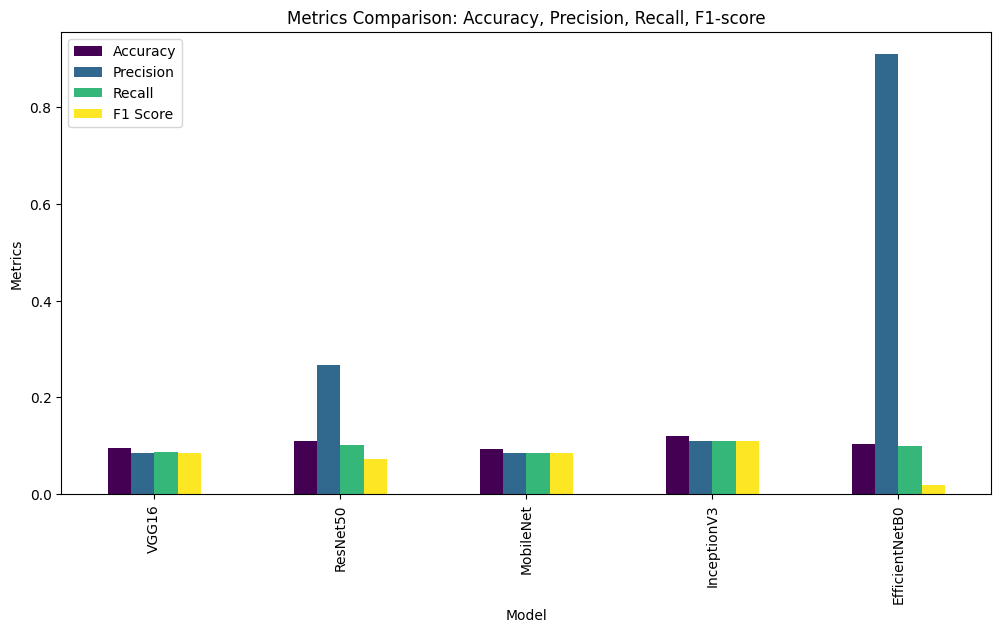

In [33]:
#sns.barplot(x=dic.index, y=dic["Accuracy"])
plt.figure(figsize=(3, 1))
dic.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.xlabel("Model")
plt.ylabel("Metrics")
plt.title("Metrics Comparison: Accuracy, Precision, Recall, F1-score")
plt.show()

Confusion Matrix of Each Model:

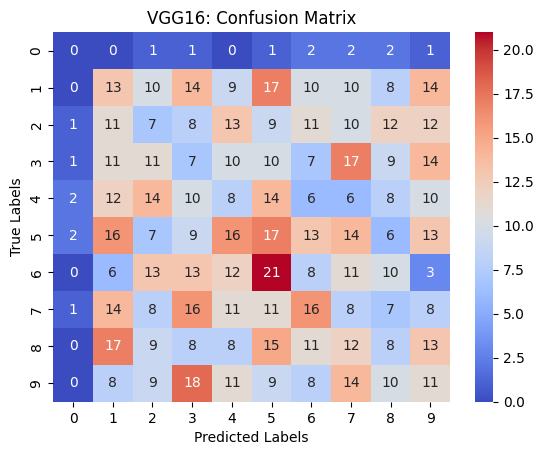

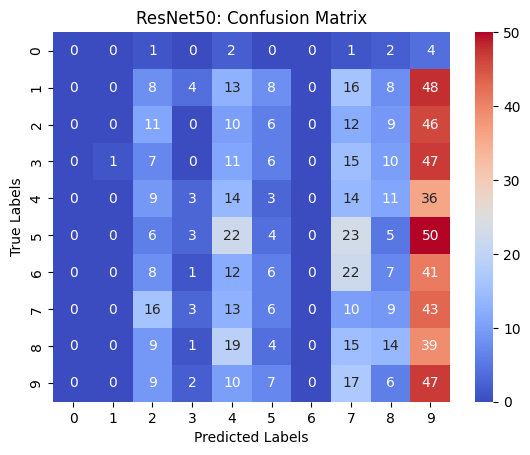

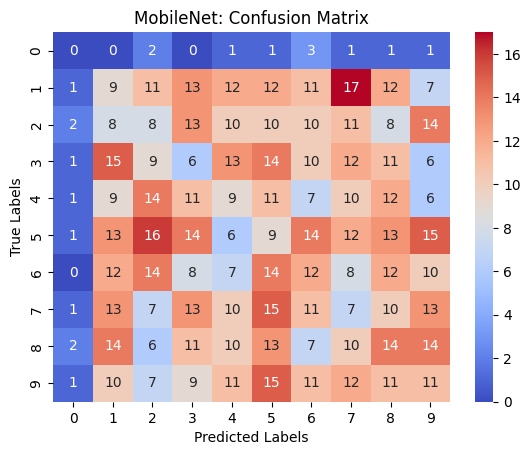

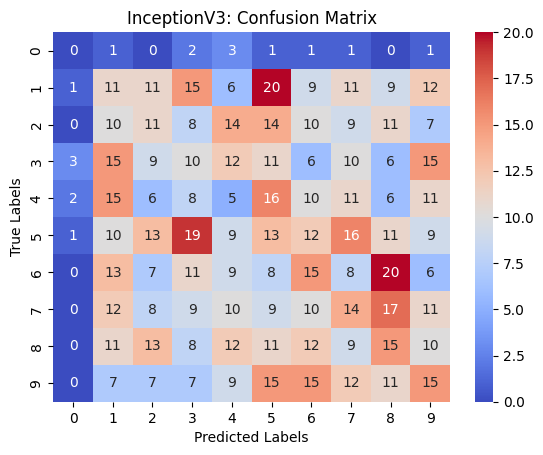

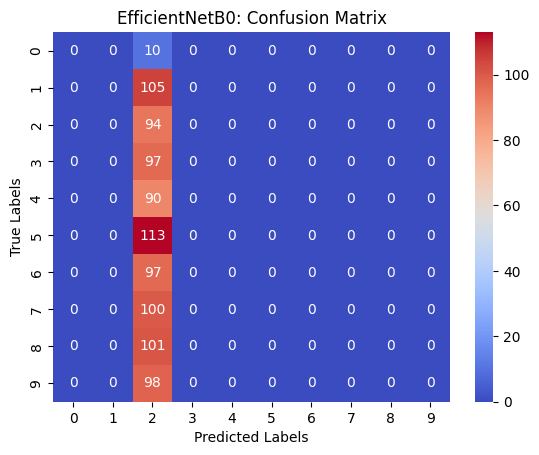

In [36]:
for model_name, metrics in metrics_dict.items():
  cm = metrics["Confusion Matrix"]
  sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm")
  plt.title(f"{model_name}: Confusion Matrix")
  plt.xlabel("Predicted Labels")
  plt.ylabel("True Labels")
  plt.show()


Visualizing the model’s performance: Accuracy & Loss

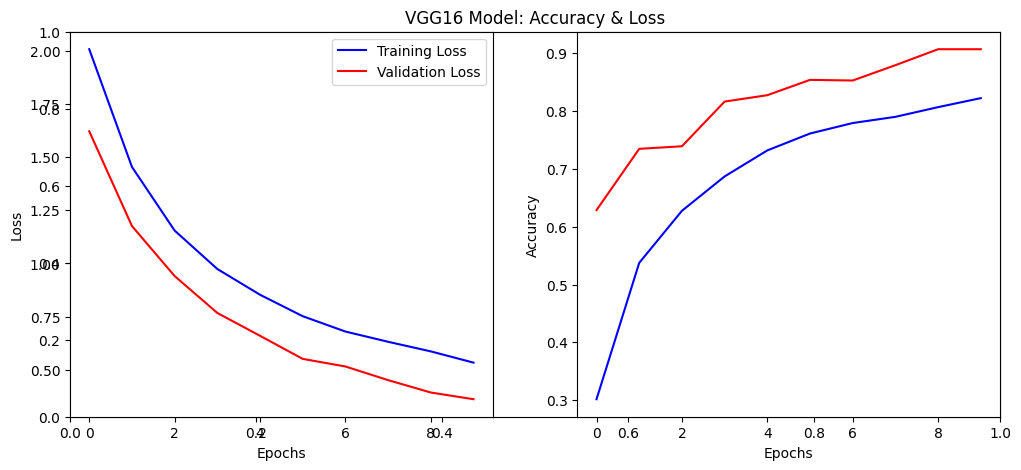

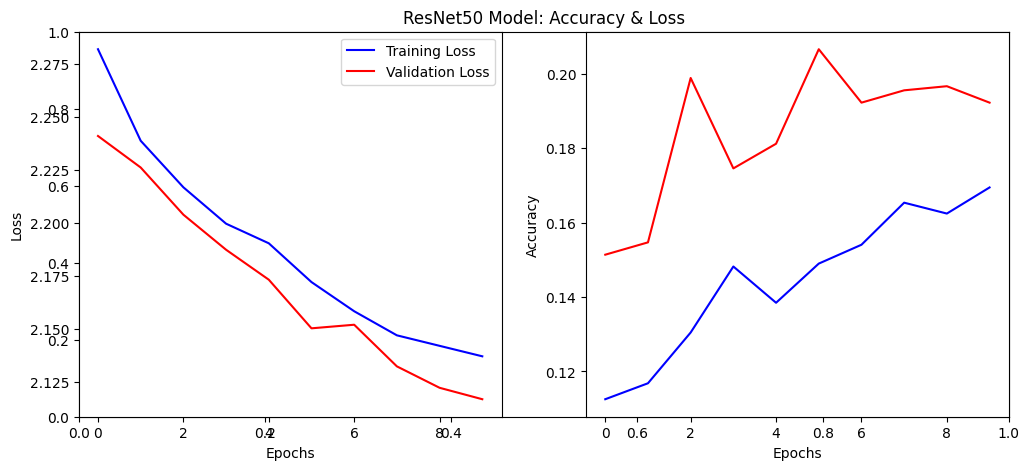

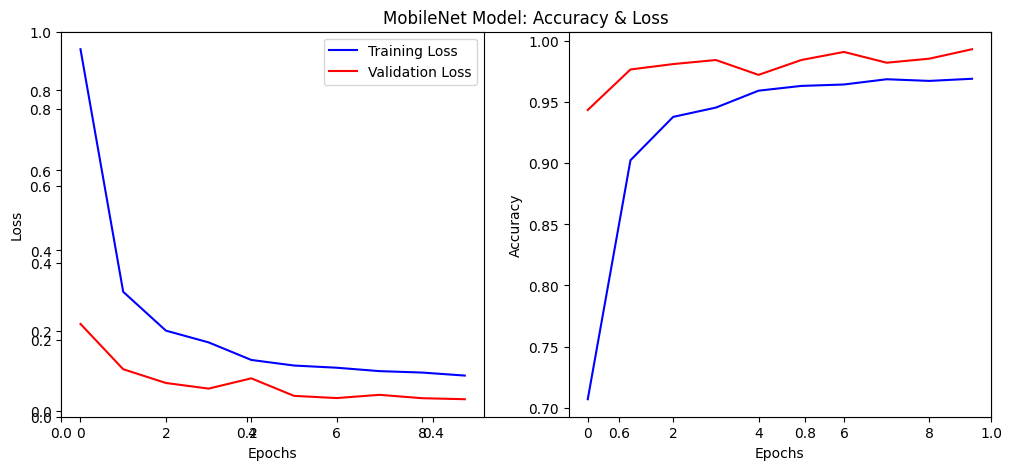

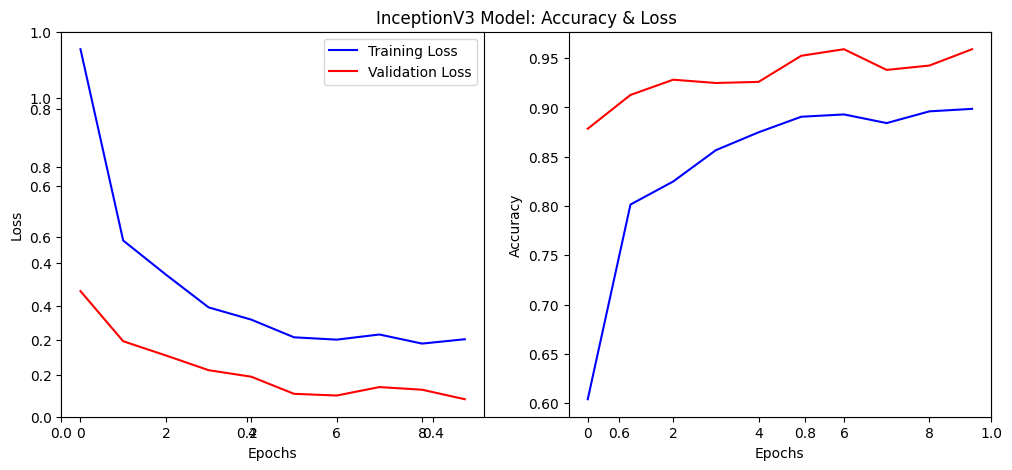

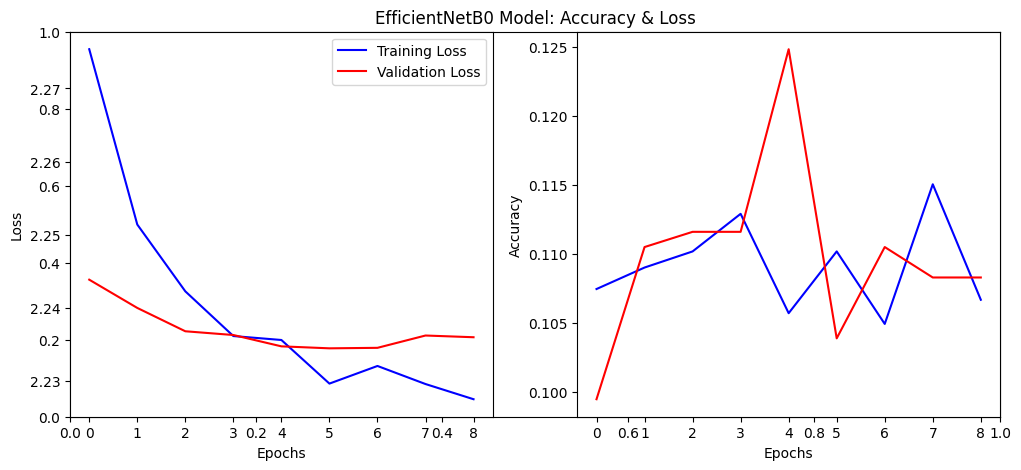

In [37]:
for model_name, history in history_dict.items():
  plt.figure(figsize=(12,5))
  plt.title(f"{model_name} Model: Accuracy & Loss")
  #Loss plot
  plt.subplot(1,2,1)
  plt.plot(history["loss"], label = "Training Loss", color = "blue")
  plt.plot(history["val_loss"], label = "Validation Loss", color = 'red')
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()


  #Accuracy plot
  plt.subplot(1,2,2)
  plt.plot(history["accuracy"], label ="Training Accuracy", color = "blue")
  plt.plot(history["val_accuracy"], label = "Validation Accuracy", color = 'red')
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")

  plt.show()

